In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv('num_booking_status.csv')

In [7]:
avg_price_per_room = data["avg_price_per_room"]

AttributeError: 'Series' object has no attribute 'key'

In [9]:
'''
attr_name = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status']
'''
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)   
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr


from sklearn import preprocessing as pre
avg_price_per_room = pd.Series(data["avg_price_per_room"])
avg_price_per_room.to_numpy()

x_norm = normalize(avg_price_per_room, 0, 1)
print(x_norm)

[0.2422103861517976, 0.2422103861517976, 0.2648468708388815, 0.24234354194407456, 0.21912117177097204, 0.45539280958721706, 0.22636484687083888, 0.2396804260985353, 0.34620505992010653, 0.2414647137150466, 0.5326231691078562, 0.3091877496671105, 0.37017310252996005, 0.19307589880159787, 0.15938748335552597, 0.25472703062583224, 0.19973368841544606, 0.38689747003994673, 0.2644474034620506, 0.3098002663115845, 0.17310252996005326, 0.4434087882822903, 0.170439414114514, 0.2804260985352863, 0.2756324900133156, 0.31424766977363516, 0.17509986684420772, 0.25166444740346205, 0.24500665778961384, 0.356404793608522, 0.1655925432756325, 0.21810918774966712, 0.18375499334221038, 0.19973368841544606, 0.2103861517976032, 0.22636484687083888, 0.2396804260985353, 0.20639147802929428, 0.27051930758988013, 0.3055925432756325, 0.2636484687083888, 0.22636484687083888, 0.19973368841544606, 0.3195739014647137, 0.17310252996005326, 0.31637816245006656, 0.2396804260985353, 0.16245006657789615, 0.102982689747

In [10]:
data["avg_price_norm"] = x_norm
data.keys()

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'avg_price_norm'],
      dtype='object')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

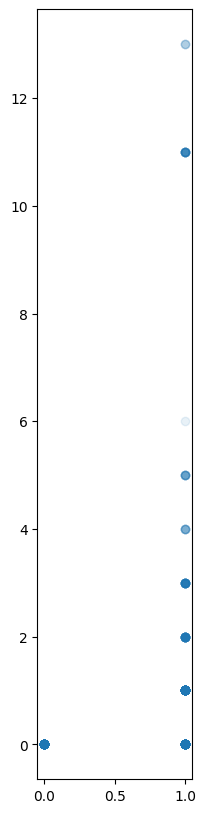

In [37]:
# scaler = pre.MinMaxScaler()
# no_of_previous_cancellations_norm = data["no_of_previous_cancellations"]
# no_of_previous_bookings_not_canceled_norm = data["no_of_previous_bookings_not_canceled"]
# scaler.fit([no_of_previous_cancellations_norm])
# scaler.fit([no_of_previous_bookings_not_canceled_norm])
plt.figure(figsize=(2, 10))
plt.scatter(data["repeated_guest"], data["no_of_previous_cancellations"], alpha=0.1)
plt.title(data["repeated_guest"])
plt.xlabel("repeated_guest")
plt.ylabel("no_of_previous_cancellations")
plt.show()

In [33]:
print(len(data))

25392


In [38]:
repeated_guest = data["repeated_guest"]
no_of_previous_cancellations = data["no_of_previous_cancellations"]
count = 0
repeated_guest_count_zero = 0
no_of_previous_cancellations_count_zero = 0
cancelled = 0
for i in range(len(repeated_guest)):
    if repeated_guest[i] != 0 and no_of_previous_cancellations[i] == 1:
        count += 1
    if repeated_guest[i] == 0:
        repeated_guest_count_zero += 1
    if no_of_previous_cancellations[i] == 1:
        no_of_previous_cancellations_count_zero += 1
        
print(count)
print(repeated_guest_count_zero)
print(no_of_previous_cancellations_count_zero)
# no_of_previous_cancellations = 0과 그 외
# repeated_guest = 대부분이 0 (한 90프로 정도)
# insight: repeated guest는 이전에 취소한 적이 있다. 100%
# insight: 이전에 취소한 적이 있는 사람은 반복된 고객이다.

133
24753
133


<AxesSubplot:>

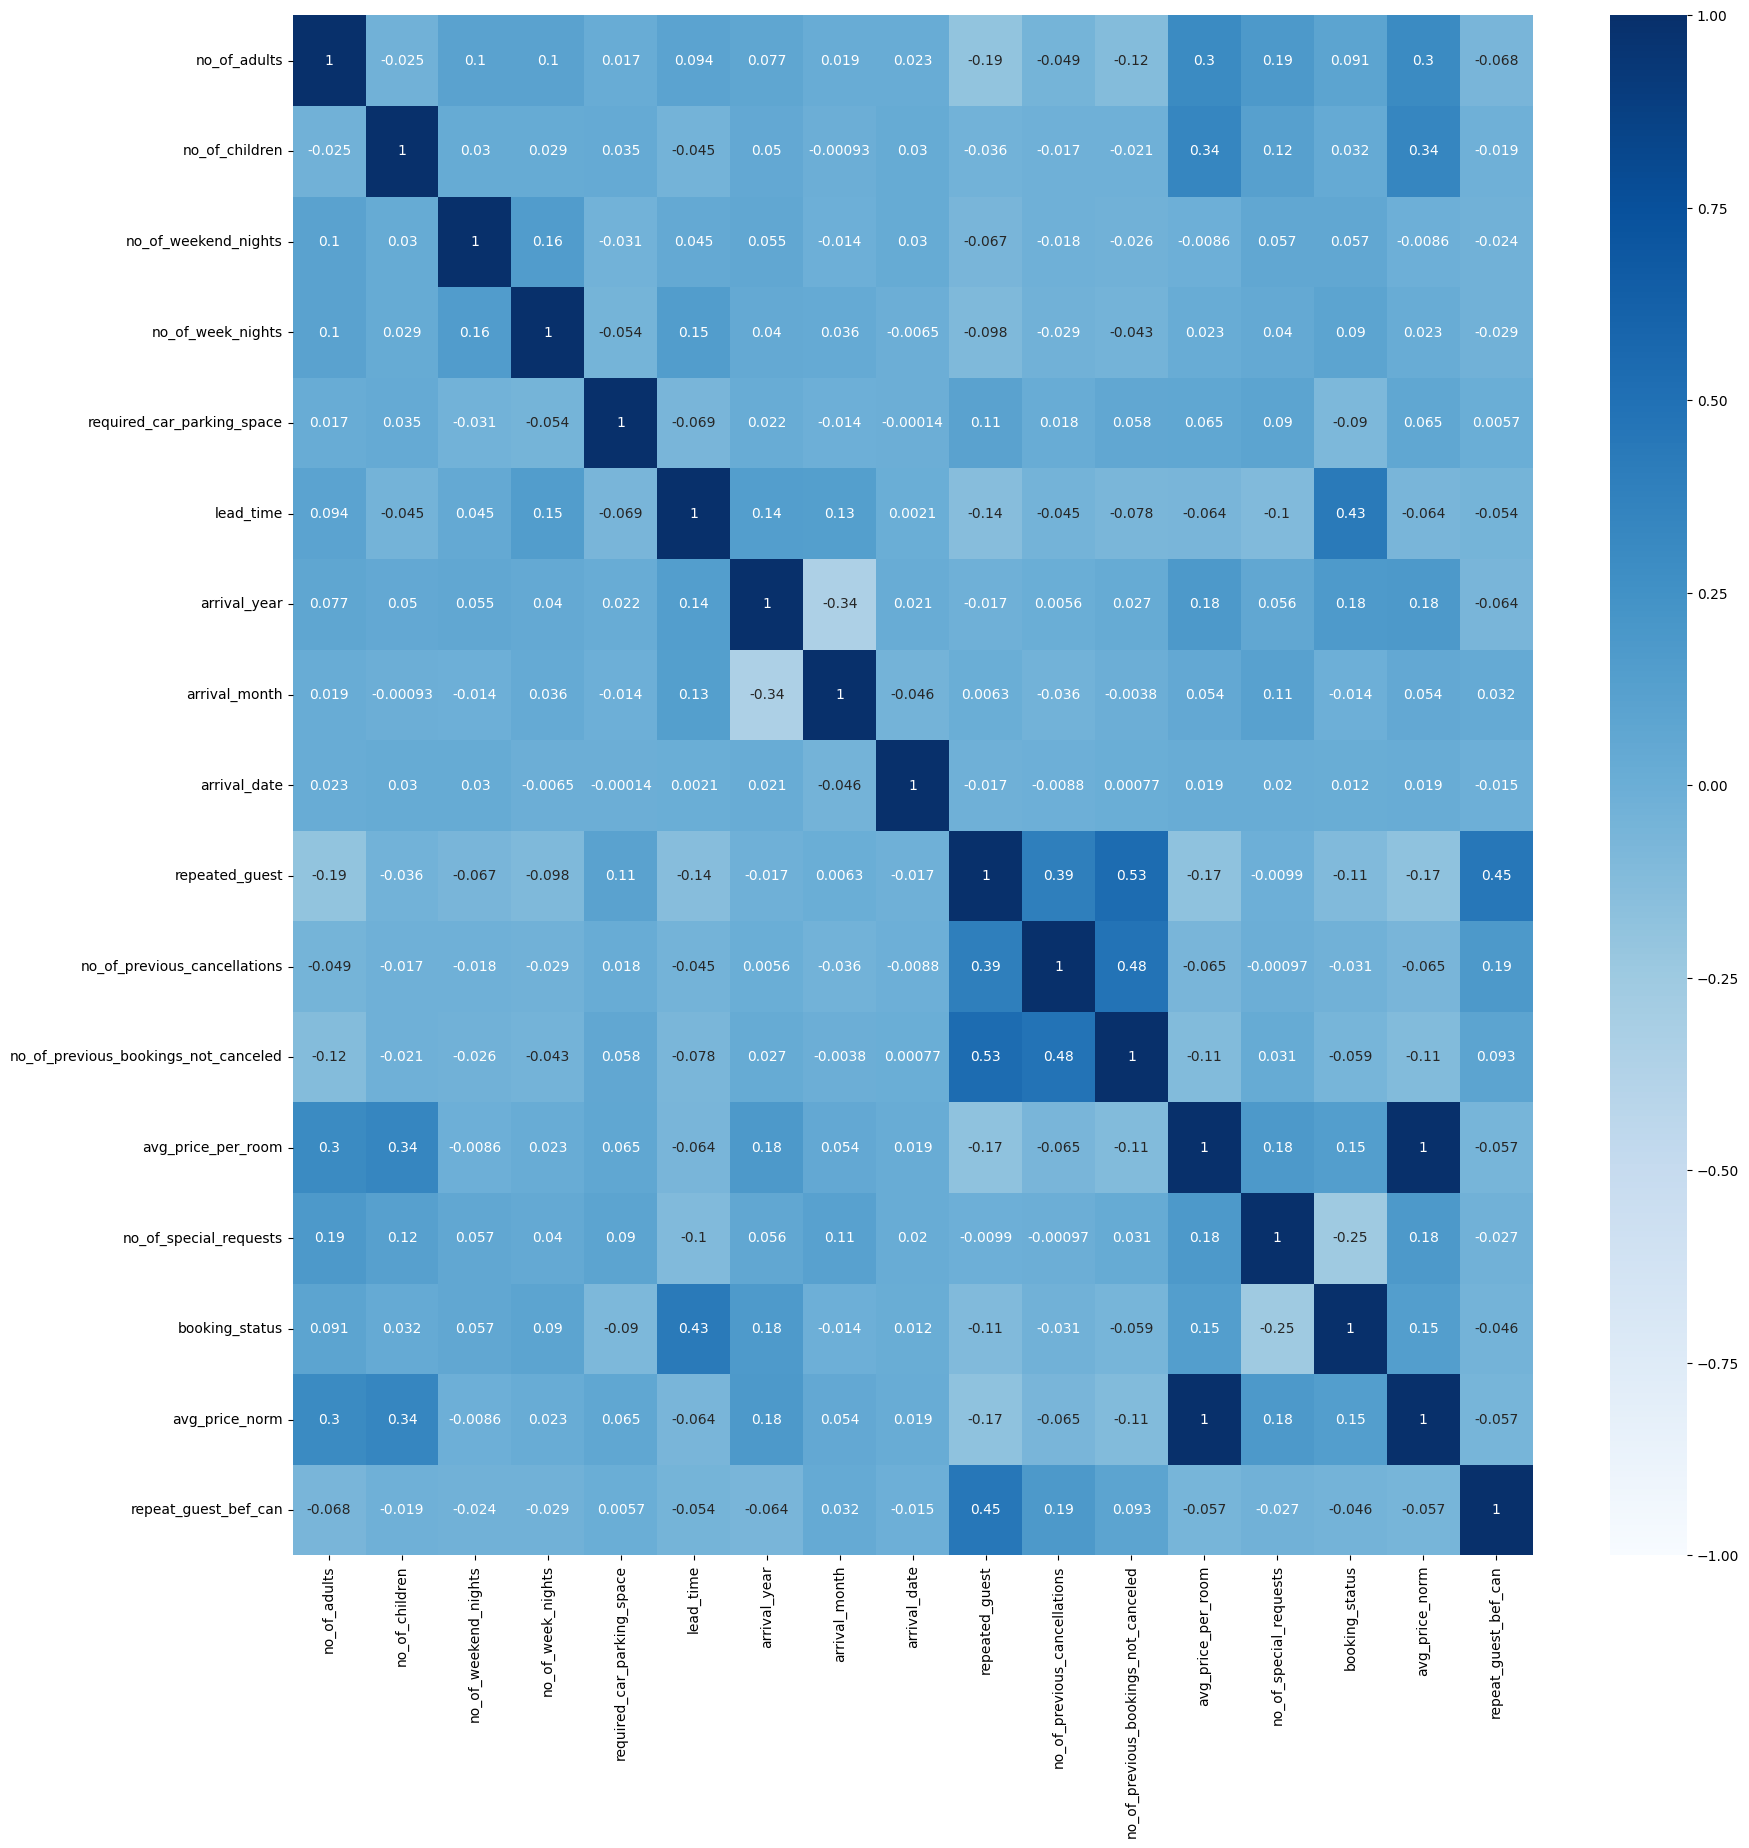

In [50]:
plt.rcParams["figure.figsize"] = (20, 20)
sb.heatmap(data.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Blues', #색상
           vmin = -1, vmax=1, #컬러차트 영역 -1 ~ +1
          )

In [48]:
repeat_guest_bef_can = [0] * len(repeated_guest)
print(repeat_guest_bef_can)
for i in range(len(repeated_guest)):
    if repeated_guest[i] != 0 and no_of_previous_cancellations[i] == 1:
        repeat_guest_bef_can[i] += 1
    else:
        repeat_guest_bef_can[i] = 0
print(set(repeat_guest_bef_can))
count = 0
for i in repeat_guest_bef_can:
    if i == 1:
        count += 1
print(count)
data["repeat_guest_bef_can"] = pd.array(repeat_guest_bef_can)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

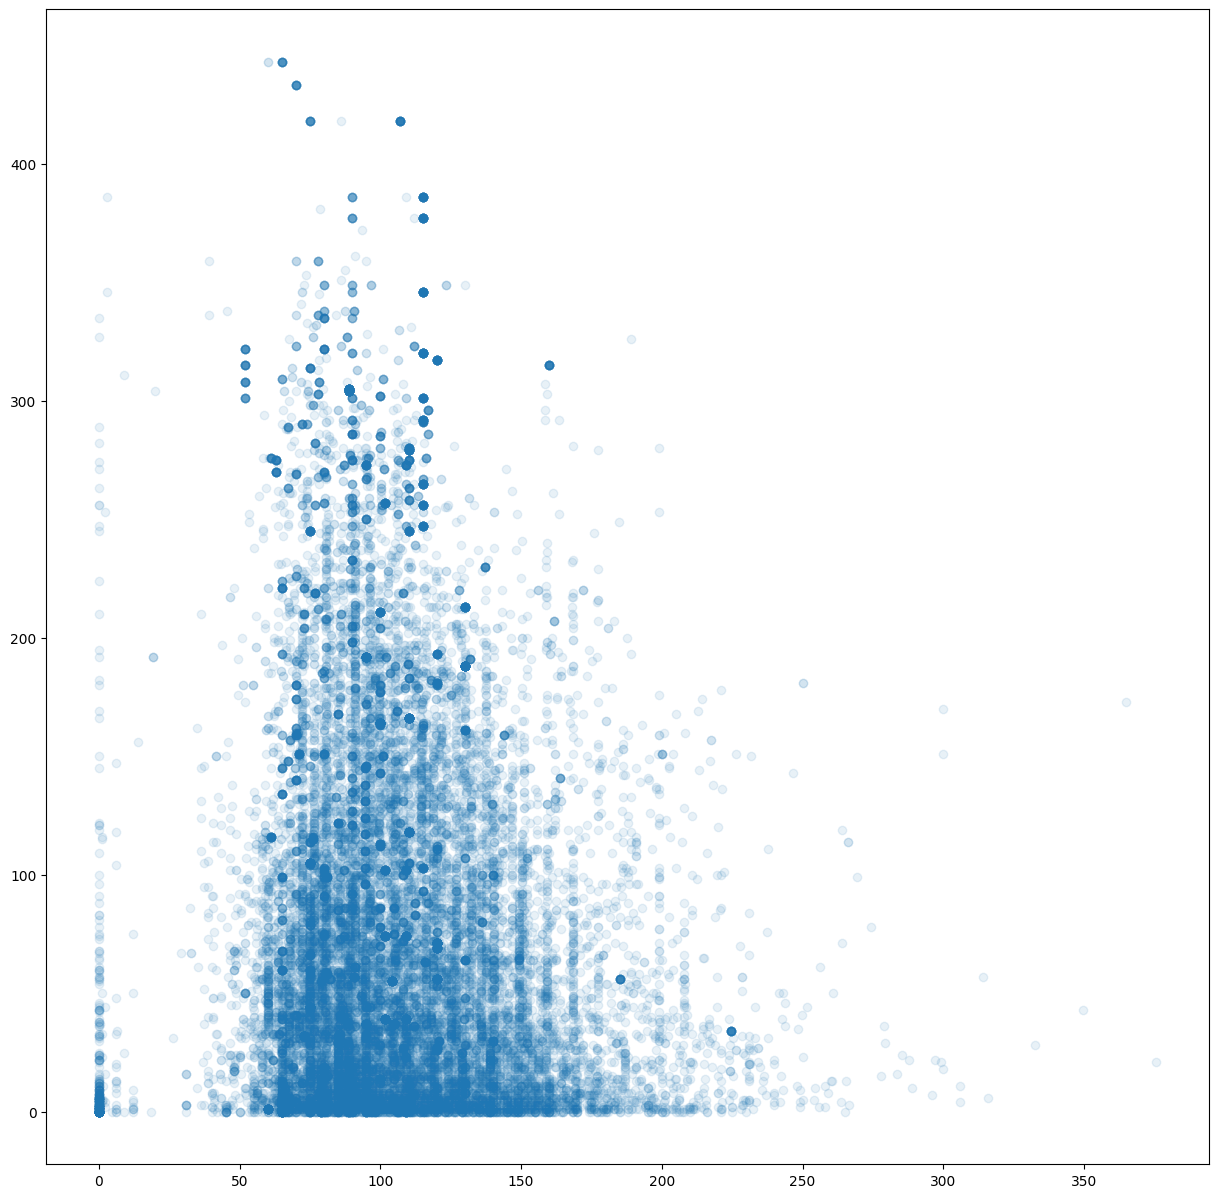

In [59]:
plt.figure(figsize=(15, 15))
plt.scatter(data["avg_price_per_room"], data["lead_time"], alpha=0.1)
plt.title(data["avg_price_per_room"])
plt.xlabel("avg_price_per_room")
plt.ylabel("lead_time")
plt.show()

In [62]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

# train = pd.read_csv('num_booking_status.csv')
#no_of_adults,no_of_children,avg_price_per_room 특징만 고려
feature_names = ["no_of_adults", "no_of_children", "lead_time", "no_of_previous_bookings_not_canceled"]
X = data[feature_names]
y = data["booking_status"]

# Decision Tree 학습/예측/평가
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
mlp_model = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300, activation = 'relu',
                        solver = 'adam')
gs = GridSearchCV(mlp_model, param_grid={'hidden_layer_sizes': [i for i in range(4,25)],
              'activation': ['tanh'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.001],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [10000],
              'early_stopping': [False],
              'warm_start': [False]})
gs.fit(X_train, y_train)
print(gs.best_params_)

k_folds = KFold(n_splits = 10)
# scores = cross_val_score(mlp_model, X, y, cv=k_folds)
scores = cross_val_score(mlp_model, X_train, y_train, cv=k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

{'activation': 'tanh', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 10000, 'power_t': 0.5, 'solver': 'adam', 'warm_start': False}
Cross Validation Scores:  [0.72883858 0.74360236 0.75442913 0.76317085 0.75135401 0.74495323
 0.75923191 0.75381585 0.74938454 0.7267356 ]
Average CV Score:  0.7475516065938582
Number of CV Scores used in Average:  10


In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

# {'activation': 'tanh', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 10000, 'power_t': 0.5, 'solver': 'adam', 'warm_start': False}

# train = pd.read_csv('num_booking_status.csv')
#no_of_adults,no_of_children,avg_price_per_room 특징만 고려
feature_names = ["no_of_adults", "no_of_children", "lead_time", "no_of_previous_bookings_not_canceled"]
X = data[feature_names]
y = data["booking_status"]

# Decision Tree 학습/예측/평가
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
mlp_model = MLPClassifier(hidden_layer_sizes= 6,
                        max_iter = 300, activation = 'relu',
                        solver = 'adam')
gs = GridSearchCV(mlp_model, param_grid={'hidden_layer_sizes': [i for i in range(4,25)],
              'activation': ['tanh'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.001],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [10000],
              'early_stopping': [False],
              'warm_start': [False]})
gs.fit(X_train, y_train)
print(gs.best_params_)

k_folds = KFold(n_splits = 10)
# scores = cross_val_score(mlp_model, X, y, cv=k_folds)
scores = cross_val_score(mlp_model, X_train, y_train, cv=k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

{'activation': 'tanh', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': 22, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 10000, 'power_t': 0.5, 'solver': 'adam', 'warm_start': False}
Cross Validation Scores:  [0.75       0.75       0.77509843 0.75430822 0.72328902 0.74741507
 0.74593796 0.75381585 0.75086164 0.75381585]
Average CV Score:  0.7504542049027475
Number of CV Scores used in Average:  10


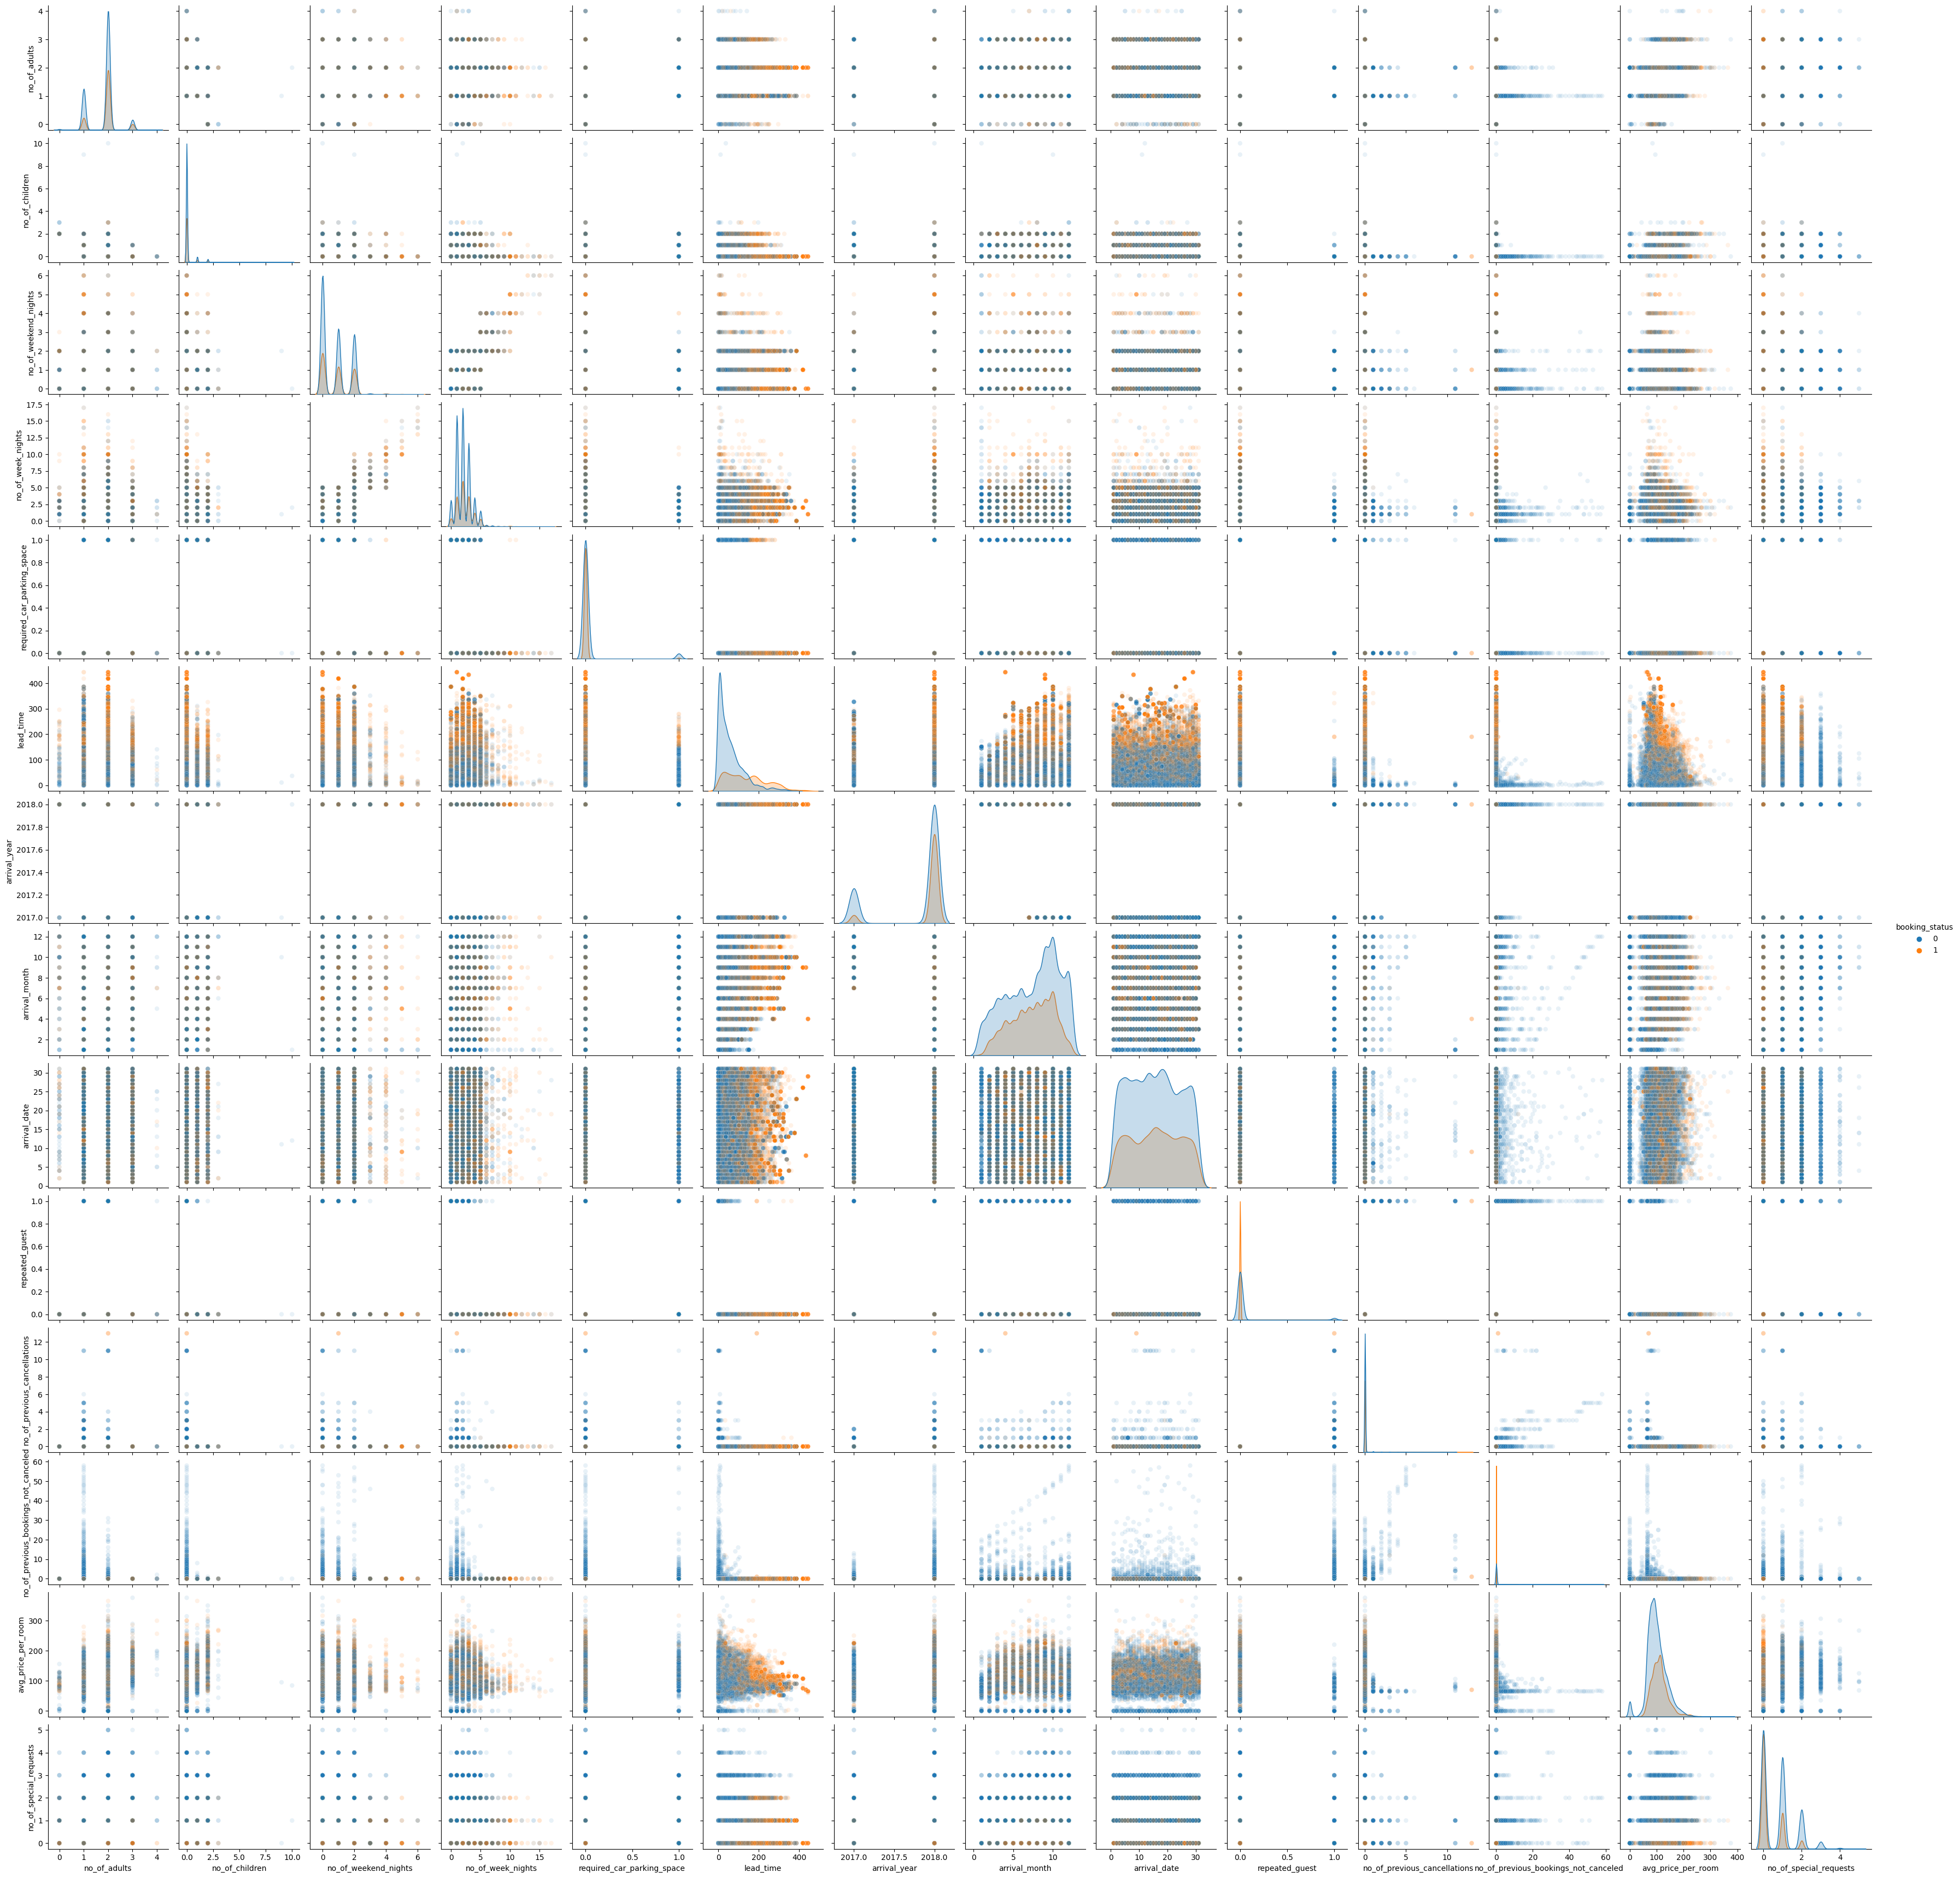

In [69]:
import seaborn as sns
sns.pairplot( data=data, vars=('no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'), plot_kws=dict(alpha=0.1), hue='booking_status' )

In [70]:
data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  25392.000000    25392.000000          25392.000000       25392.000000   
mean       1.845069        0.105151              0.810137           2.201323   
std        0.519044        0.401900              0.867761           1.396599   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              6.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                25392.000000  25392.000000  25392.000000   25392.000000   
mean                     0.031348     85.411508   2017.819471       7.423952   
std                      0.174261     85.745937      0.384635       3.059601   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     58.000000   2018.000000       8.000000   
75%                      0.000000    127.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  25392.000000    25392.000000                  25392.000000   
mean      15.625118        0.025165                      0.023905   
std        8.730304        0.156630                      0.378652   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          25392.000000        25392.000000   
mean                               0.156191          103.485770   
std                                1.818933           35.067053   
min                                0.000000            0.000000   
25%                                0.000000           80.750000   
50%                                0.000000           99.865000   
75%                                0.000000          120.150000   
max                               58.000000          375.500000   

       no_of_special_requests  booking_status  
count            25392.000000    25392.000000  
mean                 0.618305        0.326008  
std                  0.786555        0.468760  
min                  0.000000        0.000000  
25%                  0.000000        0.000000  
50%                  0.000000        0.000000  
75%                  1.000000        1.000000  
max                  5.000000        1.000000

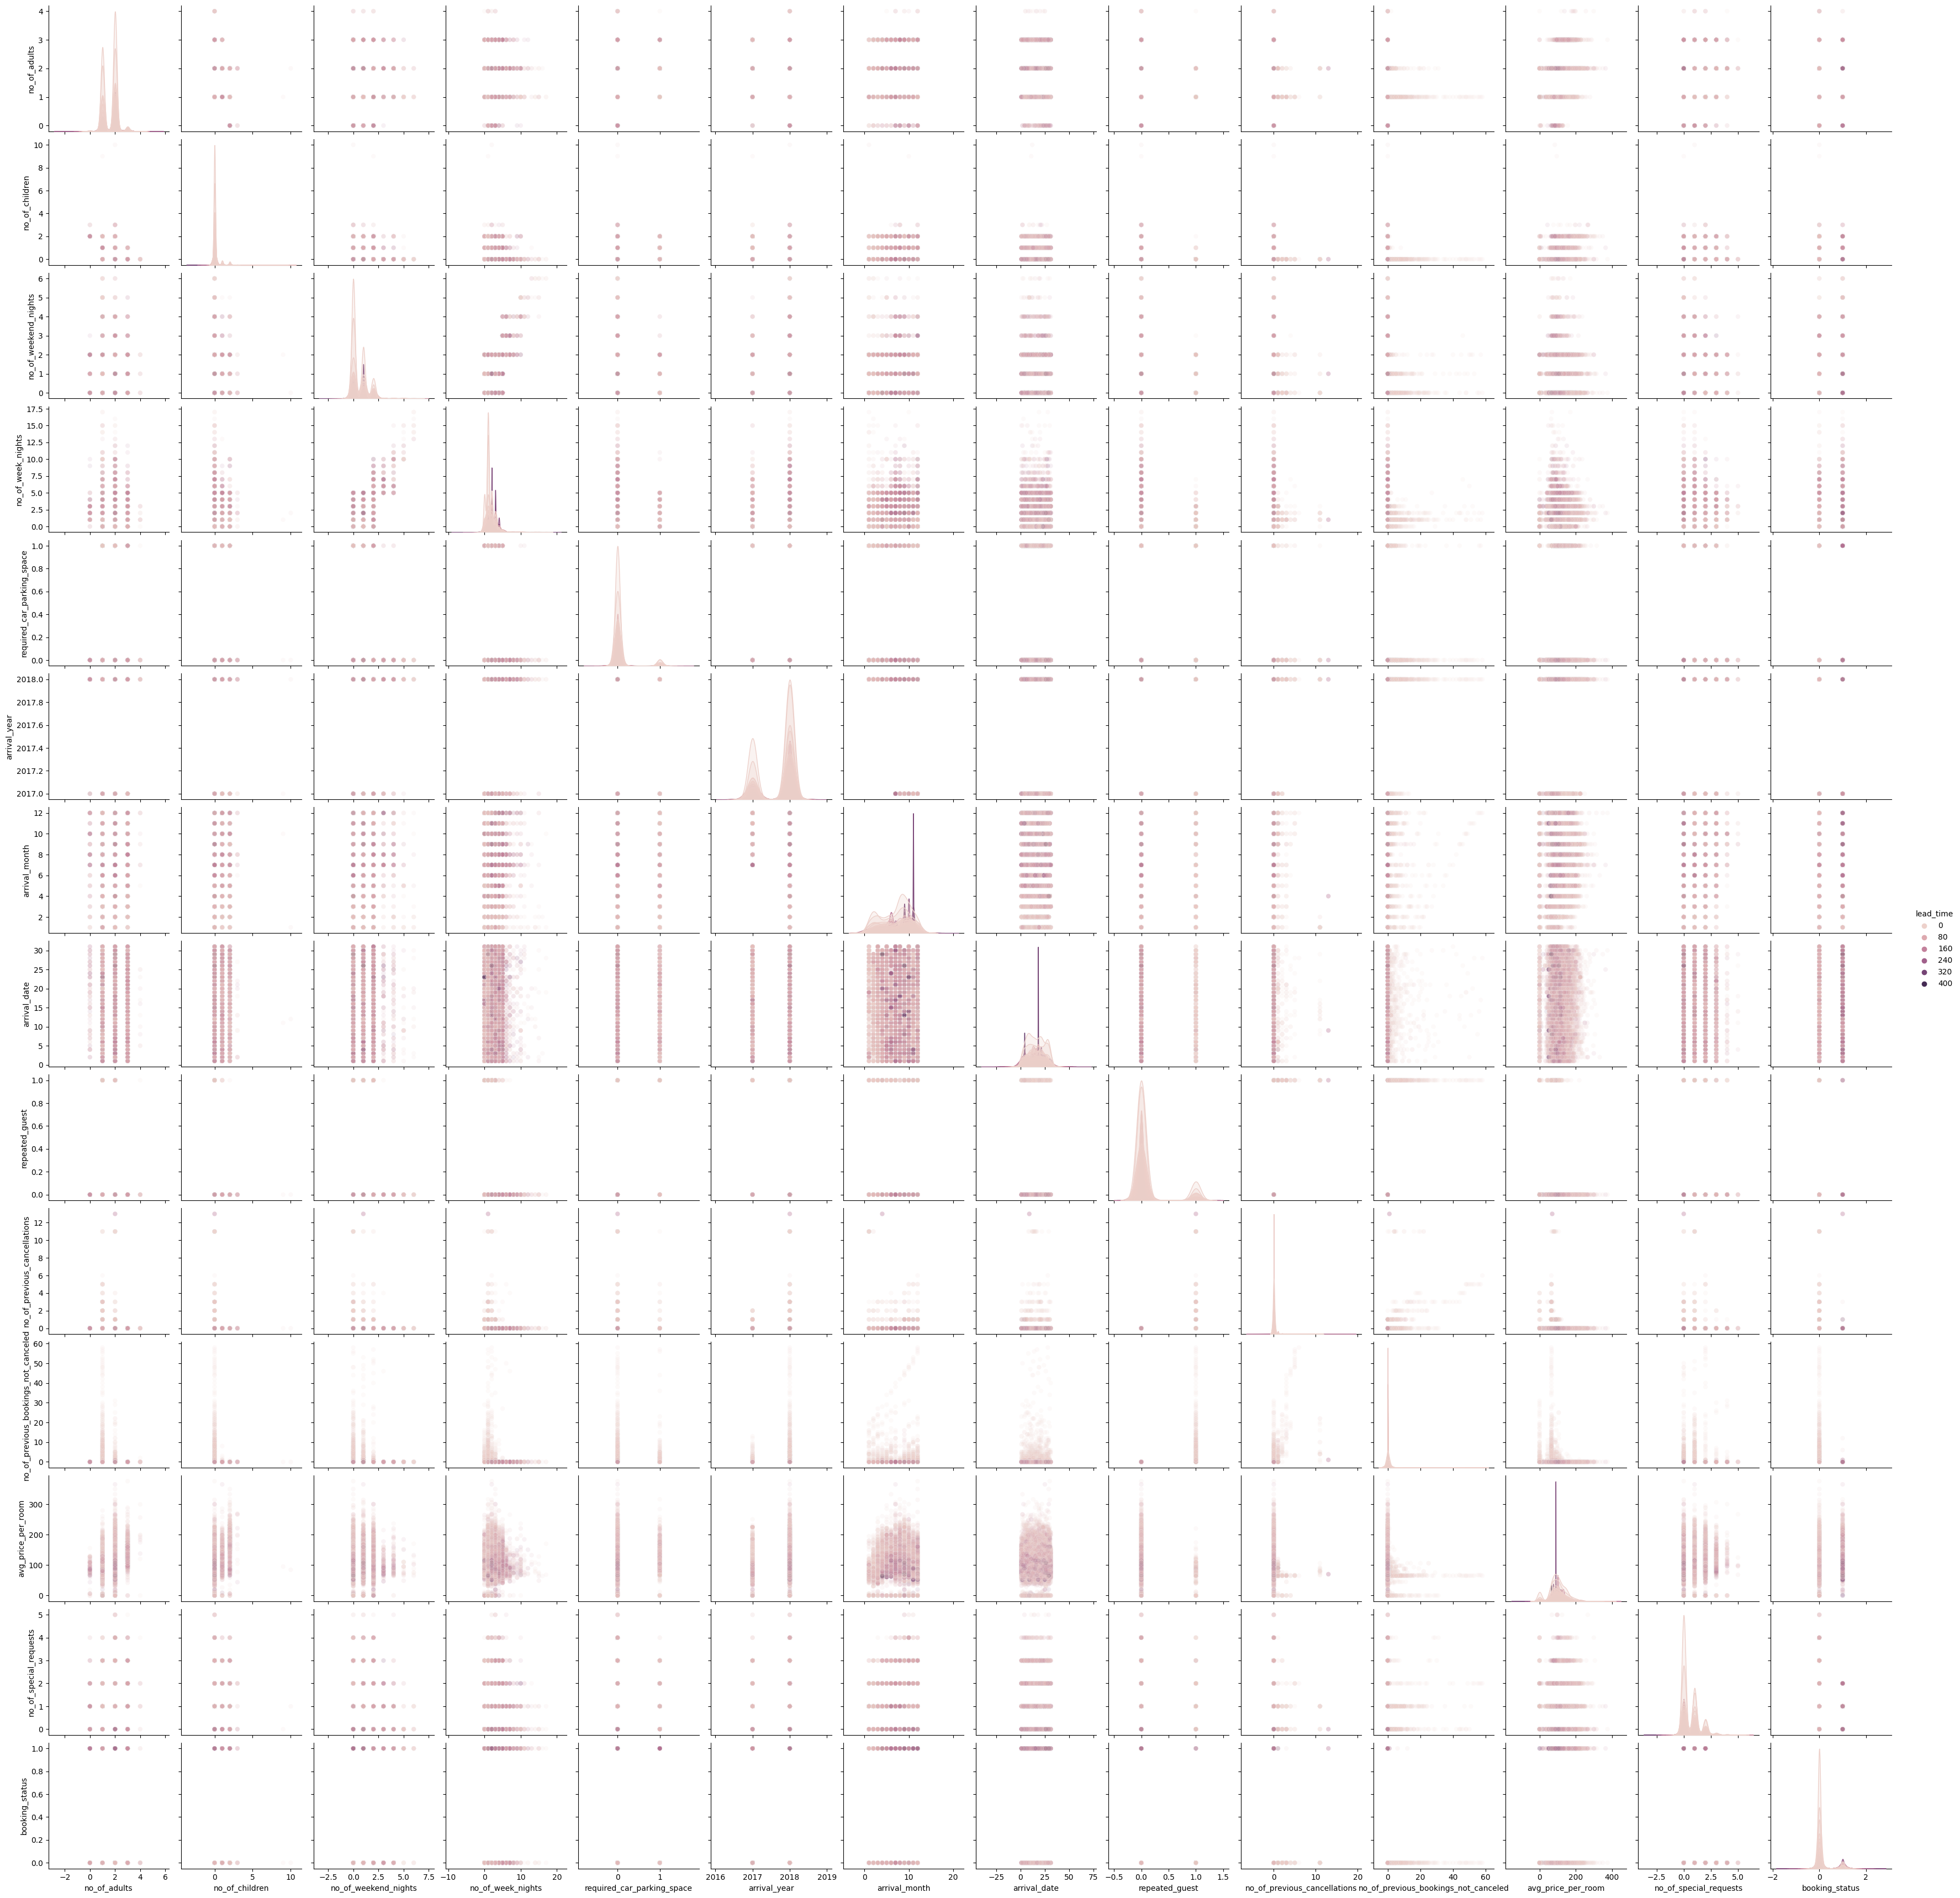

In [71]:
import seaborn as sns
sns.pairplot( data=data, vars=('no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'), plot_kws=dict(alpha=0.1), hue='lead_time' )

In [ ]:
df_norm = data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

In [ ]:
df_norm.describe()